In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy import sparse


##-----------------------------------Define the MDP components--------------------------------##

num_states = 10
num_actions = 5
states = [f's{i}' for i in range(num_states)]
actions = [f'a{i}' for i in range(num_actions)]


###------------------------ Transition probability matrix P[s, a, s']-------------------------###

# Random generation of matrix
def Markov_decision_matrix(num_states, num_actions):
  Markov = []
  for s in range(num_states):
    matrix = np.random.rand(num_actions,num_states)
    # Normalization of each row
    matrix = matrix/matrix.sum(axis=1, keepdims=True)
    Markov.append(matrix)
  return np.array(Markov)
np.random.seed(42)
P = Markov_decision_matrix(num_states, num_actions)




##--------------------------Reward function R[s, a]--------------------------------------##
R = np.round(np.random.rand(num_states, num_actions),2)  # random generation of R


# Action_value Function Q(initial value)
Q = np.zeros((num_states, num_actions))

# Discount factor
gamma = 0.9

Q.shape, R.shape, P.shape

((10, 5), (10, 5), (10, 5, 10))


# Policy Iteration
Repeat steps until convergence:

1- $\textbf{Policy evaluation}:$ keep current policy $\pi$ fixed, find
$V^{\pi_k}(.)$
+ Approximative evalution of $V^{\pi^k}:$

Iterate simplified Bellman updaate until values converge:
$$\boxed{V_{i+1}^{\pi_k}(s')=r(s,\pi_k(s))+\gamma\underset{s'}{\sum}P(s'/s,\pi(s))V_i^{\pi_k}(s')}\\ \text{(Le faire juste après comme Approximate Policy Iteartion, bien choisir le tetha de l'ordre de) (1-\gamma)^2 \epsilon/4}$$
 Here we assume that $V_0^{\pi_0}(s) = 0$


 + Exact evaluation of $V^{\pi^k}:$

$$\boxed{V^{\pi_k} =(I-\gamma P^{\pi_k})^{-1}r^{\pi_k}} \ with \ P^{\pi_k}_{s,s'}=P(s'/s,\pi_k(s))
$$


2- $\textbf{Policy improvement}$: find the best action for $V^{\pi_k}(.)$ via one-step lookahead

$$\forall s\in \mathbb{S}, \pi_{k+1}(s) = \underset{a\in\mathbb{A}}{argmax}\left[R(s,a)+\underset{s'}{\sum}P(s'/s,a)V^{\pi_k}(s')\right].$$


In [ ]:
np.random.seed(42)
##---------Random initialization of pi--------------##
pi = np.random.randint(num_actions, size = num_states)
pi

array([3, 4, 2, 4, 4, 1, 2, 2, 2, 4])

In [ ]:
I = np.eye(num_states)
#I

In [ ]:
##----------Function to evaluate the utility V on the the arbitrary policy--------------##

def Exact_Policy_evaluation(pi, P, R, gamma):
    num_states, num_actions, _ = P.shape
    P_pi = np.array([P[s,pi[s],:] for s in range(num_states)])
    R_pi = np.array([R[s,pi[s]] for s in range(num_states)])

    I = np.eye(num_states)
    V = np.dot(np.linalg.inv(I - gamma*P_pi), R_pi)

    return V

def Approximate_Policy_evaluation(pi,V, P, R, gamma, theta):
    count = 0
    num_states, num_actions, _ = P.shape
    P_pi = np.array([P[s,pi[s],:] for s in range(num_states)])
    R_pi = np.array([R[s,pi[s]] for s in range(num_states)])

    while True:
        delta = 0
        TV=R_pi + gamma*sparse.coo_array.dot(P_pi,V)
        delta=np.max(np.abs(V-TV))
        V=TV
        count+=1
        #print(dt)

        if delta <=theta:
            break
    #print("Number of iteration loop intern approximate",count)
    return V

##-----------------------Function to compute the greedy polyci-------------------------##

def Policy_improvement(V, P, R, gamma):
  num_states, num_actions, _ = P.shape
  policy = np.zeros(num_states, dtype=int)
  for s in range(num_states):
      policy[s] = np.argmax([R[s,a]+sum(gamma *P[s, a, s_next] * ( V[s_next])
                  for s_next in range(num_states))#R(s,a)+...
              for a in range(num_actions)
      ])
  return policy

##------------------------The main algorithm------------------------------##

def Policy_iteration(pi,V,P,R, gamma, method="Exact", theta = 0.0001):
  iter = 0

  if method=="Exact":
    while True:
      V_Q = Exact_Policy_evaluation(pi, P, R, gamma)
      greedy_pi = Policy_improvement(V_Q, P, R, gamma)
      iter+=1
      if greedy_pi.all() == pi.all():
        break
      pi = greedy_pi

  elif method=="Approx":
      V_Q = np.copy(V)

      while True:
        V_old = np.copy(V_Q)
        V_Q = Approximate_Policy_evaluation(pi,V_old, P, R, gamma, theta)
        greedy_pi = Policy_improvement(V_Q, P, R, gamma)
        iter+=1

        if greedy_pi.all() == pi.all():
          break

        pi = greedy_pi
  return pi, V_Q, iter

In [ ]:
V = np.zeros(num_states)

In [ ]:
optimal_policy, optimal_values , k= Policy_iteration(pi,V,P, R,gamma,"Exact", theta=0.0001)
print("Optimal Value Function:")
for i, value in enumerate(optimal_values):
    print(f"V({states[i]}) = {value:7f}")

print("Nombre d'itérations:",k)

Optimal Value Function:
V(s0) = 9.101454
V(s1) = 9.230468
V(s2) = 9.203740
V(s3) = 9.290938
V(s4) = 9.257554
V(s5) = 9.170729
V(s6) = 9.291498
V(s7) = 9.211854
V(s8) = 9.259439
V(s9) = 9.044017
Nombre d'itérations: 2


In [ ]:
print("\nOptimal Policy:")
for i, action in enumerate(optimal_policy):
  print(f"π({states[i]}) = {actions[action]}")



Optimal Policy:
π(s0) = a3
π(s1) = a3
π(s2) = a2
π(s3) = a3
π(s4) = a2
π(s5) = a4
π(s6) = a2
π(s7) = a0
π(s8) = a0
π(s9) = a4


In [ ]:
###----------------------Analyze of convergence based on gamma's value--------------------###

Gamma = [1-1e-1, 1-1e-2, 1-1e-3, 1-1e-4, 1-1e-5]
Policy_times = []
for gam in Gamma:
  start = time.time()
  _ , _, k = Policy_iteration(pi,V,P, R,gam,"Approx", theta=0.0001)
  end = time.time()
  Policy_times.append(end-start)

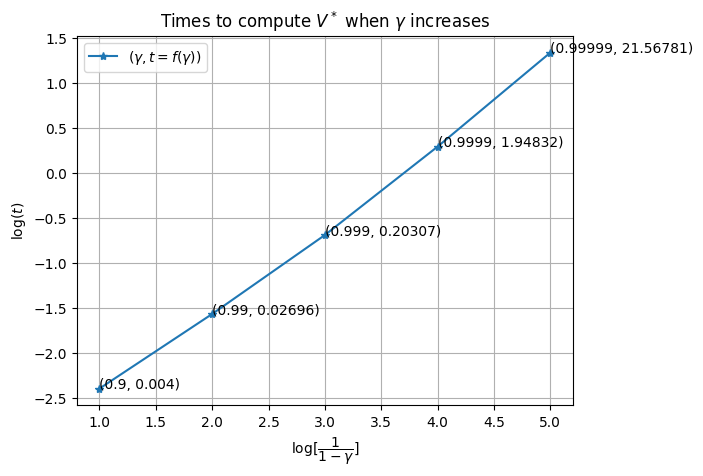

In [ ]:
Gamma_log = [np.log10(1/(1-g)) for g in Gamma] # Log(1/(1-gamma))
Times_log = [np.log10(t) for t in Policy_times] # Log(times)
plt.figure()
for i in range(len(Policy_times)):
  plt.text(Gamma_log[i],Times_log[i],f'{Gamma[i],round(Policy_times[i],5)}')

plt.plot(Gamma_log,Times_log, "-*", label="$(\gamma,t=f(\gamma))$")
plt.xlabel("$\log[\dfrac{1}{1-\gamma}]$")
plt.ylabel("$\log(t)$")
plt.title("Times to compute $V^*$ when $\gamma$ increases")
plt.legend()
plt.grid(1)

In [ ]:
print(Policy_times)

[0.009280681610107422, 0.029020071029663086, 0.1972651481628418, 1.917832612991333, 21.01394820213318]


In [ ]:
###----------------------Analyze of convergence by varying the number of states--------------------###

gam = 0.7 # Here gamma is constant
actions = 10 # Number of action is constant
Times_state = []
States = [35, 50, 100,500, 1000, 2000, 3000, 4000, 5000] # List of states
Methods = ["Exact", "Approx"]
for m in Methods:
  T = []
  for state in States:
    np.random.seed(42)
    P_s = Markov_decision_matrix(state, actions)
    R_s = np.round(np.random.rand(state, actions),2)
    pi_s = np.random.randint(actions, size = state)
    V_s = np.zeros(state)
    start = time.time()
    _ , _, k = Policy_iteration(pi_s,V_s,P_s, R_s,gam,m, theta=0.0001)
    end = time.time()
    T.append((end-start))
  Times_state.append(T)

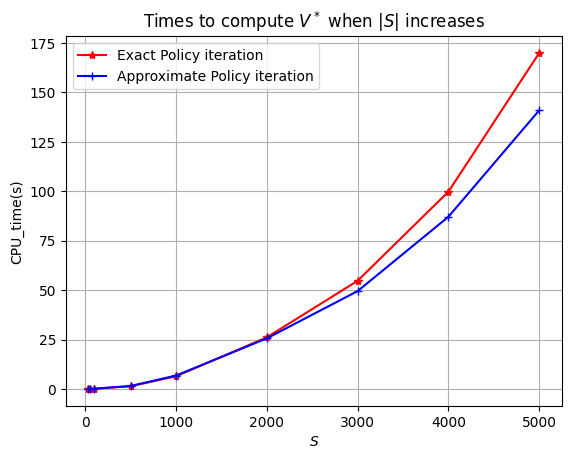

In [ ]:
plt.figure()
plt.plot(States, Times_state[0], "-*r", label=f"{Methods[0]} Policy iteration")
plt.plot(States, Times_state[1], "-+b", label=f"{Methods[1]}imate Policy iteration")
plt.xlabel("$S$")
plt.ylabel("CPU_time(s)")
plt.title("Times to compute $V^*$ when $|S|$ increases")
plt.grid(1)
plt.legend()

In [ ]:
###----------------------Analyze of convergence by varying the number of actions--------------------###

gam = 0.7 # Here gamma is constant
state = 10 # Number of state is constant
Times_action = []
Actions =[35, 50, 100,500, 1000, 2000, 3000, 4000, 5000] # List of states

Methods = ["Exact", "Approx"]
for m in Methods:
  T = []
  for actions in Actions:
    np.random.seed(42)
    P_a = Markov_decision_matrix(state, actions)
    R_a = np.round(np.random.rand(state, actions),2)
    pi_a = np.random.randint(actions, size = state)
    V_a = np.zeros(state)
    start = time.time()
    _ , _, k = Policy_iteration(pi_a,V_a,P_a, R_a,gam,m, theta=0.0001)
    end = time.time()
    T.append((end-start))
  Times_action.append(T)

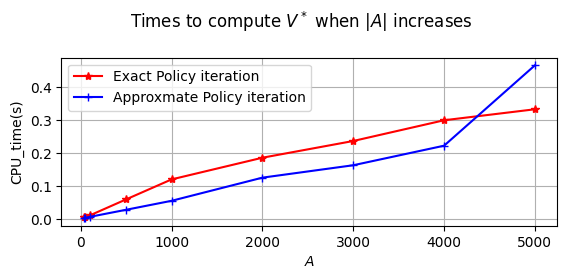

In [ ]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(States, Times_action[0], "-*r", label=f"{Methods[0]} Policy iteration")
plt.plot(States, Times_action[1], "-+b", label=f"{Methods[1]}mate Policy iteration")
plt.xlabel("$A$")
plt.ylabel("CPU_time(s)")
plt.suptitle("Times to compute $V^*$ when $|A|$ increases")
plt.grid(1)
plt.legend()

> # Test of Policy iteration methods on Sparse matrix

In [ ]:
#----------------------Function to create sparse transition matrix--------------#

def create_random_sparse_3d_transition_matrix(nb_states, nb_actions, nb_next_states, density=0.3):
    """
    Create a random sparse 3D transition matrix for an MDP.

    Parameters:
    - nb_states: Number of states.
    - nb_actions: Number of actions.
    - nb_next_states: Number of next states.
    - density: The proportion of non-zero elements (default is 0.1).

    Returns:
    - A 3D numpy array representing the transition matrix.
    """
    data = []
    row_indices = []
    col_indices = []

    rng = np.random.default_rng()

    for s in range(nb_states):
        for a in range(nb_actions):
            # Determine how many transitions to generate for this state-action pair
            num_transitions = int(density * nb_next_states)
            if num_transitions < 1:
                num_transitions = 1

            # Randomly choose next states and probabilities
            next_states = rng.choice(nb_next_states, size=num_transitions, replace=False)
            probabilities = rng.random(size=num_transitions)
            probabilities /= probabilities.sum()  # Normalize to sum to 1

            for s_prime, p in zip(next_states, probabilities):
                row_index = s * nb_actions + a
                row_indices.append(row_index)
                col_indices.append(s_prime)
                data.append(p)

    # Convert to numpy arrays
    data = np.array(data)
    row_indices = np.array(row_indices)
    col_indices = np.array(col_indices)

    # Create sparse matrix in COO format
    transition_matrix_2d = sparse.coo_matrix((data, (row_indices, col_indices)),
                                                   shape=(nb_states * nb_actions, nb_next_states))
   # Convert to a dense 3D numpy array
    transition_matrix_3d = np.zeros((nb_states, nb_actions, nb_next_states))

    for row, col, val in zip(row_indices, col_indices, data):
        s = row // nb_actions
        a = row % nb_actions
        transition_matrix_3d[s, a, col] = val

    return transition_matrix_3d

# Example usage
nb_states = 5
nb_actions = 2
nb_next_states = 5
density = 0.3  # 30% of transitions will be non-zero

transition_matrix_3d = create_random_sparse_3d_transition_matrix(nb_states, nb_actions, nb_next_states, density)

# Display the 3D transition matrix
print("3D Transition Matrix:\n", transition_matrix_3d[:,:,0].shape)


3D Transition Matrix:
 (5, 2)


## When $|S|$ increases

In [ ]:

gam = 0.7 # Here gamma is constant
actions = 10 # Number of action is constant
Density = 0.3
Sp_Times_state = []
States = [50,100,500,1000,2000, 3000,4000,5000] # List of states
Methods = ["Exact", "Approx"]
for m in Methods:
  T = []
  for state in States:
    np.random.seed(42)
    P_s = create_random_sparse_3d_transition_matrix(state, actions, state, Density) # Sparse transition matrix
    R_s = np.round(np.random.rand(state, actions),2)
    pi_s = np.random.randint(actions, size = state)
    V_s = np.zeros(state)
    start = time.time()
    _ , _, k = Policy_iteration(pi_s,V_s,P_s, R_s,gam,m, theta=0.0001)
    end = time.time()
    T.append((end-start))
  Sp_Times_state.append(T)

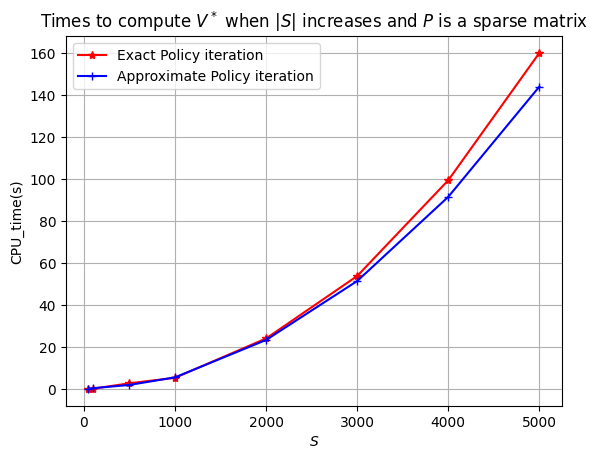

In [ ]:
plt.figure()
plt.plot(States, Sp_Times_state[0], "-*r", label=f"{Methods[0]} Policy iteration")
plt.plot(States, Sp_Times_state[1], "-+b", label=f"{Methods[1]}imate Policy iteration")
plt.xlabel("$S$")
plt.ylabel("CPU_time(s)")
plt.title("Times to compute $V^*$ when $|S|$ increases and $P$ is a sparse matrix")
plt.grid(1)
plt.legend()

## When $|A|$ increases

In [ ]:

gam = 0.7 # Here gamma is constant
state = 10 # Number of action is constant
Density = 0.6
ASp_Times_state = []
Action = [50,100,500,1000,2000,3000,4000,5000] # List of states
Methods = ["Exact", "Approx"]
for m in Methods:
  T = []
  for actions in Action:
    np.random.seed(42)
    P_a = create_random_sparse_3d_transition_matrix(state, actions, state, Density) # Sparse transition matrix
    R_a = np.round(np.random.rand(state, actions),2)
    pi_a = np.random.randint(actions, size = state)
    V_a = np.zeros(state)
    start = time.time()
    _ , _, k = Policy_iteration(pi_a,V_a,P_a, R_a,gam,m, theta=0.0001)
    end = time.time()
    T.append((end-start))
  ASp_Times_state.append(T)

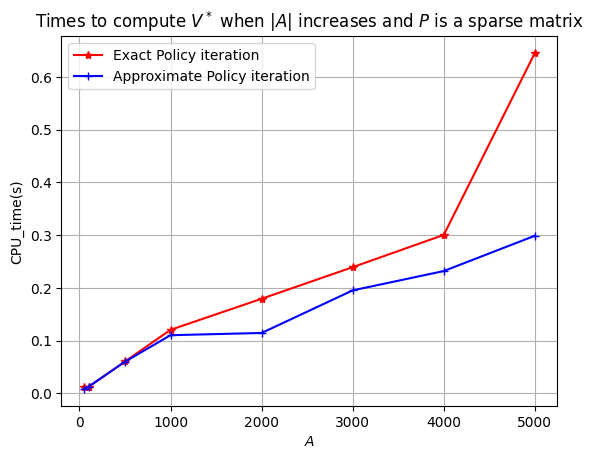

In [ ]:
plt.figure()
plt.plot(Action, ASp_Times_state[0], "-*r", label=f"{Methods[0]} Policy iteration")
plt.plot(Action, ASp_Times_state[1], "-+b", label=f"{Methods[1]}imate Policy iteration")
plt.xlabel("$A$")
plt.ylabel("CPU_time(s)")
plt.title("Times to compute $V^*$ when $|A|$ increases and $P$ is a sparse matrix")
plt.grid(1)
plt.legend()